In [61]:

import pandas as pd 
from pathlib import Path
import hvplot.pandas
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import datetime






In [62]:
austin_texas = ("Crime_Reports.csv")
austin_texas


'Crime_Reports.csv'

In [63]:
austin_texas_df = pd.read_csv(austin_texas, low_memory= False, parse_dates=True)
austin_texas_df

#"ISO-8859-1"

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419618,20215001631,DEBIT CARD ABUSE,1108,N,09/24/2020 12:00:00 PM,09/24/2020,1200.0,01/13/2021 10:27:00 AM,01/13/2021,1027.0,...,24.47,N,01/14/2021,NaN,NaN,3118294.0,10050405.0,30.211876,-97.731707,"(30.2118759, -97.73170695)"
2419619,20105013578,BURGLARY OF VEHICLE,601,N,03/19/2010 07:00:00 PM,03/19/2010,1900.0,03/19/2010 11:16:00 PM,03/19/2010,2316.0,...,19.11,N,03/25/2010,23F,Theft,3105575.0,10069711.0,30.265757,-97.770554,"(30.2657568, -97.77055439)"
2419620,20085066651,PROTECTIVE ORDER,3829,N,12/16/2008 03:56:00 PM,12/16/2008,1556.0,12/16/2008 03:56:00 PM,12/16/2008,1556.0,...,13.00,NaN,NaN,NaN,NaN,3105754.0,10060029.0,30.239131,-97.770694,"(30.23913102, -97.77069399)"
2419621,20101570072,VIOL CITY ORDINANCE - OTHER,3299,N,06/06/2010 12:31:00 AM,06/06/2010,31.0,06/06/2010 12:31:00 AM,06/06/2010,31.0,...,431.00,C,08/07/2010,NaN,NaN,3130528.0,10104030.0,30.358489,-97.688952,"(30.35848873, -97.68895198)"


In [64]:
#Drop unnecessary columns

austin_texas_df = austin_texas_df.drop(columns=['Census Tract', 'Clearance Status', 'APD Sector', 'Council District', 'APD District',
                                  'PRA', 'Incident Number', 'Occurred Time',
                                 'Report Date', 'Report Time', 'X-coordinate', 'Y-coordinate',
                                 'Latitude', 'Longitude', 'Location', 'UCR Category','Highest Offense Code'
                                 ])

austin_texas_df.head(12)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description
0,FAMILY DISTURBANCE,N,02/16/2006 02:25:00 PM,02/16/2006,02/16/2006 02:25:00 PM,RESIDENCE / HOME,7000 DECKER 1422,NaN,NaN,NaN
1,TAMPERING WITH ID NUMBER,N,09/14/2004 03:32:00 PM,09/14/2004,09/14/2004 03:32:00 PM,NaN,3301 CR 100,NaN,09/14/2004,NaN
2,FAMILY DISTURBANCE,N,04/06/2006 10:29:00 AM,04/06/2006,04/06/2006 10:29:00 AM,RESIDENCE / HOME,5005 W FRANCES PL,NaN,05/01/2006,NaN
3,SEXUAL ASSAULT OF CHILD/OBJECT,Y,01/01/2009 12:01:00 AM,01/01/2009,03/26/2013 04:56:00 PM,RESIDENCE / HOME,900 BLOCK E 32ND ST,78705.0,04/11/2013,Rape
4,RAPE OF A CHILD,Y,06/28/2016 01:05:00 AM,06/28/2016,06/28/2016 01:05:00 AM,RESIDENCE / HOME,6900 BLOCK BRANCHWOOD DR,78744.0,07/01/2016,Rape
5,RAPE,Y,03/04/2010 07:15:00 PM,03/04/2010,03/11/2010 05:06:00 PM,RESIDENCE / HOME,400 BLOCK ANGEL OAK ST,78748.0,03/18/2010,Rape
6,RAPE,N,07/01/2007 12:00:00 PM,07/01/2007,07/01/2007 12:00:00 PM,RESIDENCE / HOME,1700 BLOCK WOOTEN DR,78757.0,08/02/2007,Rape
7,SEXUAL ASSAULT W/ OBJECT,N,08/07/2006 10:28:00 PM,08/07/2006,08/07/2006 10:28:00 PM,RESIDENCE / HOME,500 BLOCK E OLTORF ST,78704.0,08/22/2006,Rape
8,PROTECTIVE ORDER,N,12/04/2018 02:53:00 PM,12/04/2018,12/04/2018 02:53:00 PM,RESIDENCE / HOME,UNKNOWN,NaN,12/04/2018,NaN
9,EXPLOSIVE ORDNANCE DISPOSAL,N,07/20/2007 02:00:00 AM,07/20/2007,07/20/2007 02:00:00 AM,RESIDENCE / HOME,1711 WESTHEIMER DR,NaN,NaN,NaN


In [65]:
# Drop any duplicates that may be in the data set 
clean_crime_data_df = austin_texas_df.drop_duplicates()

#print out the clean data
clean_crime_data_df.count()

Highest Offense Description    2418874
Family Violence                2418874
Occurred Date Time             2418737
Occurred Date                  2418874
Report Date Time               2418873
Location Type                  2399982
Address                        2418862
Zip Code                       2409916
Clearance Date                 2075260
Category Description            890591
dtype: int64

In [66]:
#print out the amount the crime occurred for each particular crime

clean_crime_data_df['Highest Offense Description'].value_counts()



BURGLARY OF VEHICLE               250481
THEFT                             226705
FAMILY DISTURBANCE                203995
CRIMINAL MISCHIEF                 139843
ASSAULT W/INJURY-FAM/DATE VIOL     86737
                                   ...  
COERCION OF PUBLIC SERVANT             1
SALE OF DXM TO MINOR                   1
EXPIRED-ATT FORCED SODOMY              1
VIOL OF PRISONERS RIGHT                1
CRASH/NEGLIGENT HOMICIDE               1
Name: Highest Offense Description, Length: 433, dtype: int64

In [67]:
#create another column that extracts only the year from "Ocurred Date" and name it "Date Stamp"
clean_crime_data_df['Date Stamp'] = pd.DatetimeIndex(clean_crime_data_df['Occurred Date']).year
clean_crime_data_df

/var/folders/26/x6_l2qcn2kj_kcgkkfht28580000gn/T/ipykernel_42445/3865811516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_crime_data_df['Date Stamp'] = pd.DatetimeIndex(clean_crime_data_df['Occurred Date']).year


,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description,Date Stamp
0,FAMILY DISTURBANCE,N,02/16/2006 02:25:00 PM,02/16/2006,02/16/2006 02:25:00 PM,RESIDENCE / HOME,7000 DECKER 1422,NaN,NaN,NaN,2006
1,TAMPERING WITH ID NUMBER,N,09/14/2004 03:32:00 PM,09/14/2004,09/14/2004 03:32:00 PM,NaN,3301 CR 100,NaN,09/14/2004,NaN,2004
2,FAMILY DISTURBANCE,N,04/06/2006 10:29:00 AM,04/06/2006,04/06/2006 10:29:00 AM,RESIDENCE / HOME,5005 W FRANCES PL,NaN,05/01/2006,NaN,2006
3,SEXUAL ASSAULT OF CHILD/OBJECT,Y,01/01/2009 12:01:00 AM,01/01/2009,03/26/2013 04:56:00 PM,RESIDENCE / HOME,900 BLOCK E 32ND ST,78705.0,04/11/2013,Rape,2009
4,RAPE OF A CHILD,Y,06/28/2016 01:05:00 AM,06/28/2016,06/28/2016 01:05:00 AM,RESIDENCE / HOME,6900 BLOCK BRANCHWOOD DR,78744.0,07/01/2016,Rape,2016
...,...,...,...,...,...,...,...,...,...,...,...
2419618,DEBIT CARD ABUSE,N,09/24/2020 12:00:00 PM,09/24/2020,01/13/2021 10:27:00 AM,OTHER / UNKNOWN,3800 DROSSETT DR,78744.0,01/14/2021,NaN,2020
2419619,BURGLARY OF VEHICLE,N,03/19/2010 07:00:00 PM,03/19/2010,03/19/2010 11:16:00 PM,FIELD / WOODS,2201 ANDREW ZILKER RD,78746.0,03/25/2010,Theft,2010
2419620,PROTECTIVE ORDER,N,12/16/2008 03:56:00 PM,12/16/2008,12/16/2008 03:56:00 PM,RESIDENCE / HOME,1106 WEATHERS LN,78704.0,NaN,NaN,2008
2419621,VIOL CITY ORDINANCE - OTHER,N,06/06/2010 12:31:00 AM,06/06/2010,06/06/2010 12:31:00 AM,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,675 E RUNDBERG LN,78753.0,08/07/2010,NaN,2010


In [68]:
#Get all the data associated with the years 2019-2021
clean_crime_data_df = clean_crime_data_df.loc[(clean_crime_data_df["Date Stamp"] >= 2019) & (clean_crime_data_df["Date Stamp"] <= 2021)]
clean_crime_data_df

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Location Type,Address,Zip Code,Clearance Date,Category Description,Date Stamp
11,ASSAULT CONTACT-SEXUAL NATURE,N,05/21/2019 08:52:00 AM,05/21/2019,05/21/2019 08:52:00 AM,OTHER / UNKNOWN,BU00 BLOCK CREEK COVE,NaN,05/23/2019,NaN,2019
15,IDENTITY THEFT,N,04/08/2021 05:17:00 PM,04/08/2021,08/02/2021 05:17:00 PM,RESIDENCE / HOME,8056 GATES LN,NaN,08/03/2021,NaN,2021
42,RAPE,Y,12/26/2020 10:01:00 PM,12/26/2020,12/26/2020 10:01:00 PM,RESIDENCE / HOME,2000 BLOCK WILLOW CREEK DR,78741.0,01/13/2021,Rape,2020
48,RAPE,Y,10/31/2020 05:00:00 PM,10/31/2020,12/22/2020 02:49:00 PM,RESIDENCE / HOME,00 BLOCK SAN SABA ST,78702.0,03/16/2021,Rape,2020
58,TERRORISTIC THREAT,Y,05/18/2021 11:51:00 AM,05/18/2021,05/20/2021 01:01:00 PM,RESIDENCE / HOME,702 MATHESON WAY,NaN,05/25/2021,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...
2419596,CHILD CUSTODY INTERFERE,N,09/09/2021 06:00:00 PM,09/09/2021,09/16/2021 09:01:00 AM,RESIDENCE / HOME,3016 PUEBLA DR,78617.0,09/16/2021,NaN,2021
2419600,THEFT OF AUTO PARTS,N,09/19/2020 01:20:00 AM,09/19/2020,09/19/2020 11:41:00 AM,RESIDENCE / HOME,4609 RAINTREE BLVD,78745.0,09/23/2020,Theft,2020
2419602,DEBIT CARD ABUSE,N,02/28/2021 12:00:00 PM,02/28/2021,03/05/2021 08:33:00 AM,CONVENIENCE STORE,12503 LAMPLIGHT VILLAGE AVE,78727.0,03/08/2021,NaN,2021
2419603,BURGLARY NON RESIDENCE,N,10/14/2021 02:14:00 AM,10/14/2021,10/14/2021 02:14:00 AM,LIQUOR STORE,12636 RESEARCH BLVD SVRD SB,78759.0,10/18/2021,Burglary,2021


In [69]:
# Count how many unique Offense Descriptions
print(clean_crime_data_df['Highest Offense Description'].nunique())
#clean_crime_data_df.count()

364


In [70]:
#Get the top 3 Highest Offense crimes/ this line of code will also be used in the the bar chart for the "2019-2021 overall"
clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(3)

FAMILY DISTURBANCE     30378
BURGLARY OF VEHICLE    26314
THEFT                  22935
Name: Highest Offense Description, dtype: int64

In [71]:
#retrieve the total number of crimes for 2019 alone
highest_offense_2019 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2019, "Highest Offense Description"])
highest_offense_2019.count()


Highest Offense Description    103035
dtype: int64

In [72]:
#retrieve the total number of crimes for 2020 alone
highest_offense_2020 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2020, "Highest Offense Description"])
highest_offense_2020.count()

Highest Offense Description    98838
dtype: int64

In [73]:
#retrieve the total number of crimes for 2021 alone
highest_offense_2021 = pd.DataFrame(clean_crime_data_df.loc[clean_crime_data_df["Date Stamp"] == 2021, "Highest Offense Description"])
highest_offense_2021.count()

Highest Offense Description    91610
dtype: int64

In [74]:
#find the mean average for the top 3 crimes for each year (2019-2021)

highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3).mean()
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3).mean()
highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3).mean()


10593.0

## Overall Statistics for Top 3 Highest Offense Crimes

79627

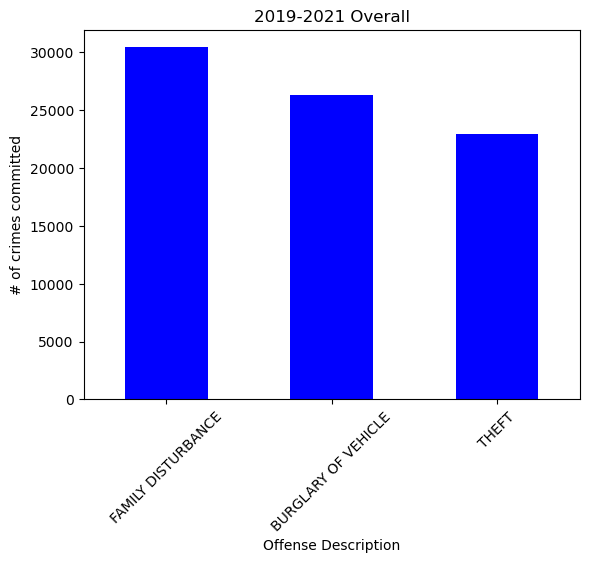

In [75]:
#make a chart here showing 2019-2021 with the crime statistics taken from each year on total offence count 
clean_data_chart = clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(3)
clean_data_chart
plot_panda = clean_data_chart.plot.bar(color='b')

plt.title("2019-2021 Overall")
plt.ylabel("# of crimes committed")
plt.xlabel("Offense Description")
plt.xticks(rotation=45)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(3).sum()

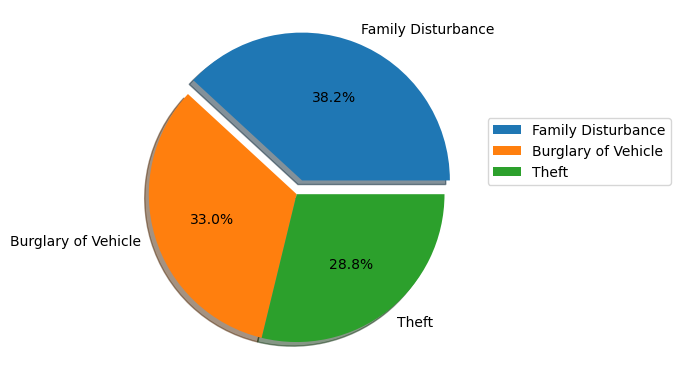

79627

In [76]:
#make a pie chart here showing 2019-2021 with the crime statistics taken from each year on total offence count 
y = clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(3)
mylabels = ["Family Disturbance", "Burglary of Vehicle", "Theft"]
myexplode = [0.1, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode, autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()
clean_crime_data_df['Highest Offense Description'].value_counts().nlargest(3).sum()

## 2019 Statistics for Top 3 Highest Offense Crimes

BURGLARY OF VEHICLE    11754
FAMILY DISTURBANCE     10401
THEFT                   9624
Name: Highest Offense Description, dtype: int64

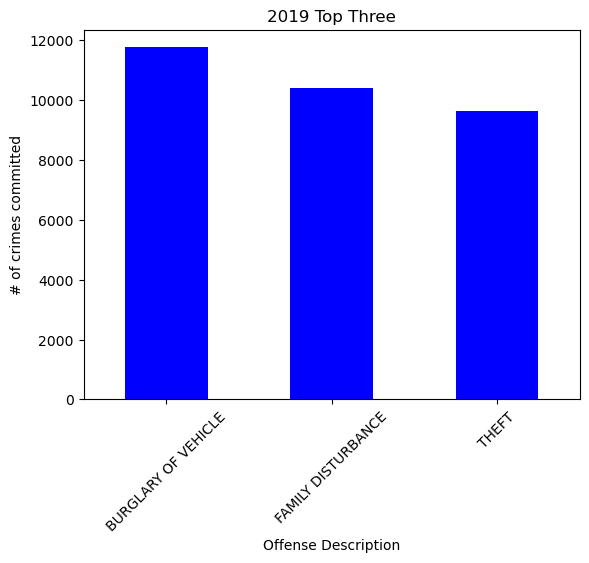

In [77]:
#Make a bar chart using the top 3 crimes of 2019

highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3)


clean_data_chart_1 = highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3)
clean_data_chart_1
plot_panda = clean_data_chart_1.plot.bar(color='b')
plt.title("2019 Top Three")
plt.ylabel("# of crimes committed")
plt.xlabel("Offense Description")
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3)



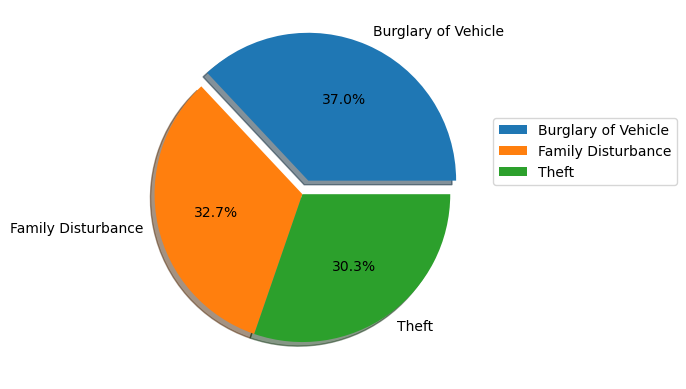

BURGLARY OF VEHICLE    11754
FAMILY DISTURBANCE     10401
THEFT                   9624
Name: Highest Offense Description, dtype: int64

In [78]:
#make a pie chart here showing 2019 with the crime statistics taken from each year on total offence count 
y = highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3)
mylabels = ["Burglary of Vehicle", "Family Disturbance", "Theft"]
myexplode = [0.1, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode,autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2019['Highest Offense Description'].value_counts().nlargest(3)

##  2020 Statistics for Top 3 Highest Offense Crimes

FAMILY DISTURBANCE     10289
BURGLARY OF VEHICLE     9532
THEFT                   7563
Name: Highest Offense Description, dtype: int64

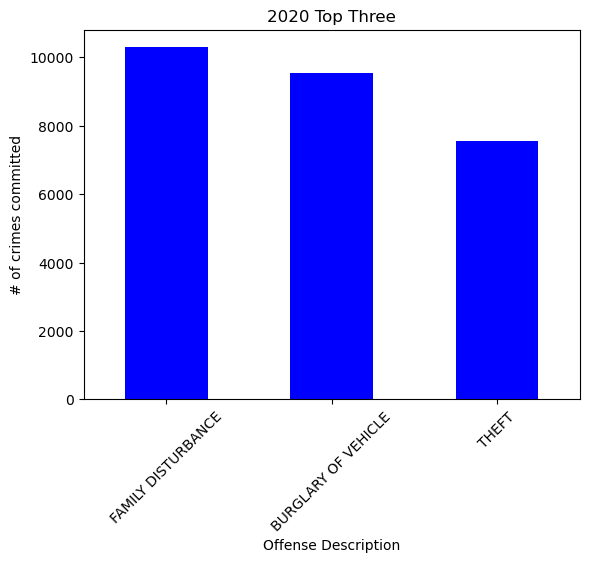

In [79]:
#make a bar chart using the top 3 crimes for 2020
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3)
clean_data_chart_2 = highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3)
clean_data_chart_2
plot_panda = clean_data_chart_2.plot.bar(color='b')
plt.title("2020 Top Three")
plt.ylabel("# of crimes committed")
plt.xlabel("Offense Description")
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3)

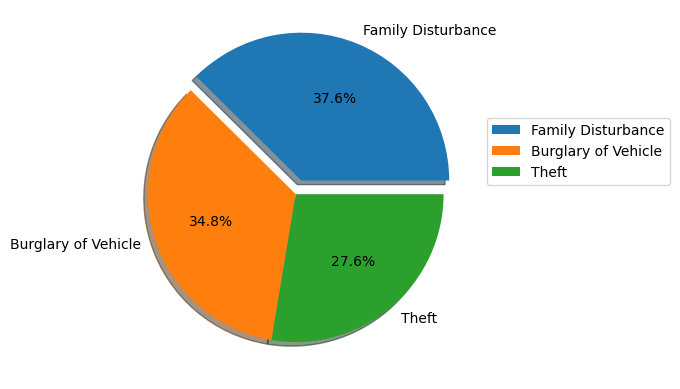

FAMILY DISTURBANCE     10289
BURGLARY OF VEHICLE     9532
THEFT                   7563
Name: Highest Offense Description, dtype: int64

In [80]:
#Make a pie chart for 2020 top 3 crimes
y = highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3)
mylabels = ["Family Disturbance", "Burglary of Vehicle", "Theft"]
myexplode = [0.1, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode, autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2020['Highest Offense Description'].value_counts().nlargest(3)

## 2021 Statistics for Top 3 Highest Offense Crimes

FAMILY DISTURBANCE     9688
THEFT                  5748
BURGLARY OF VEHICLE    5028
Name: Highest Offense Description, dtype: int64

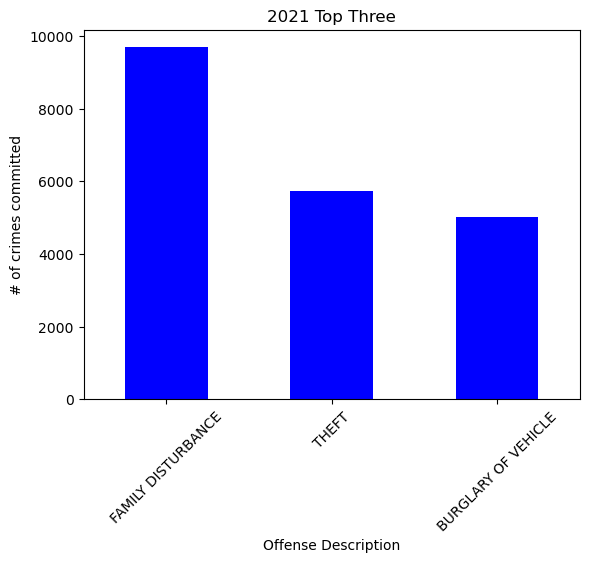

In [81]:
#make a bar chart showing the top 3 crimes for 2021
highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3)

clean_data_chart_3 = highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3)
clean_data_chart_3
plot_panda = clean_data_chart_3.plot.bar(color='b')
plt.title("2021 Top Three")
plt.ylabel("# of crimes committed")
plt.xlabel("Offense Description")
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3)

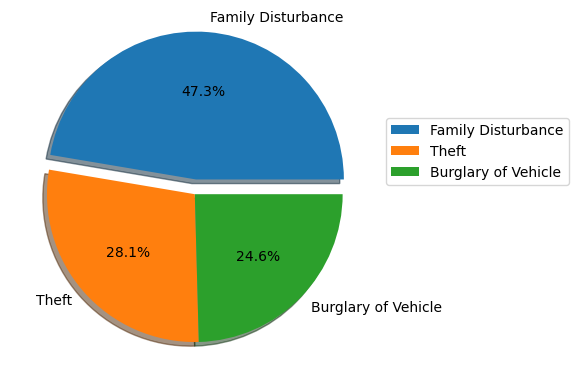

FAMILY DISTURBANCE     9688
THEFT                  5748
BURGLARY OF VEHICLE    5028
Name: Highest Offense Description, dtype: int64

In [82]:
#make a pie chart showing top 3 crimes of 2021
y = highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3)
mylabels = ["Family Disturbance", "Theft", "Burglary of Vehicle"]
myexplode = [0.1, 0, 0]
plt.pie(y, labels = mylabels, shadow = True, explode = myexplode,autopct='%1.1f%%')
plt.legend(title = "Total Crimes Committed:")
plt.legend(bbox_to_anchor=(0.8,0.5), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()
highest_offense_2021['Highest Offense Description'].value_counts().nlargest(3)

## Summary Statistics for Top 3 Highest Offense Crimes

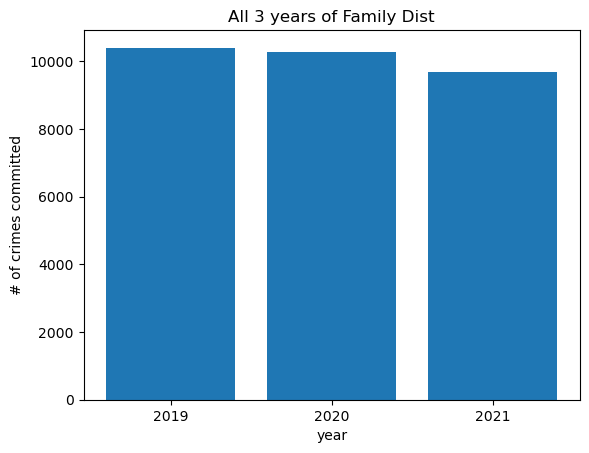

[10401, 10289, 9688]

In [83]:
#create variables to utilize in your overall summary charts 

Family_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "FAMILY DISTURBANCE"])

Family_2020 = len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Family_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "FAMILY DISTURBANCE"])
Family_2019
Burglary_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
Burglary_2020= len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "BURGLARY OF VEHICLE"])
Burglary_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "BURGLARY OF VEHICLE"])

theft_2019 = len(highest_offense_2019[highest_offense_2019['Highest Offense Description'] == "THEFT"])
theft_2020 = len(highest_offense_2020[highest_offense_2020['Highest Offense Description'] == "THEFT"])
theft_2021 = len(highest_offense_2021[highest_offense_2021['Highest Offense Description'] == "THEFT"])



Family_dis = [Family_2019, Family_2020, Family_2021]
years = ["2019", "2020", "2021"]
plt.bar(years, Family_dis)
plt.title("All 3 years of Family Dist")
plt.ylabel("# of crimes committed")
plt.xlabel("year")
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()
Family_dis

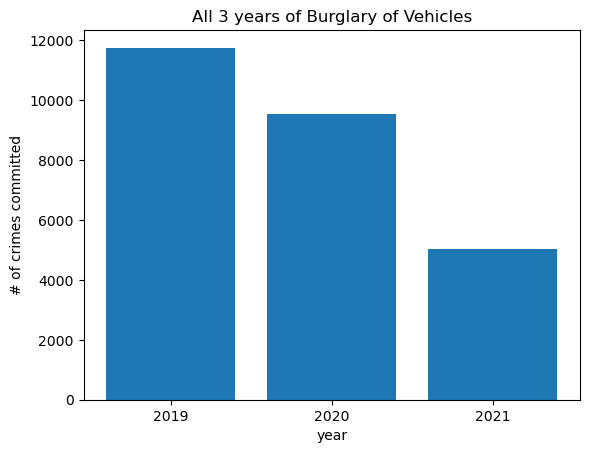

[11754, 9532, 5028]

In [84]:
Burg_veh = [Burglary_2019, Burglary_2020, Burglary_2021]
years = ["2019", "2020", "2021"]
plt.bar(years, Burg_veh)
plt.title("All 3 years of Burglary of Vehicles")
plt.ylabel("# of crimes committed")
plt.xlabel("year")
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()
Burg_veh

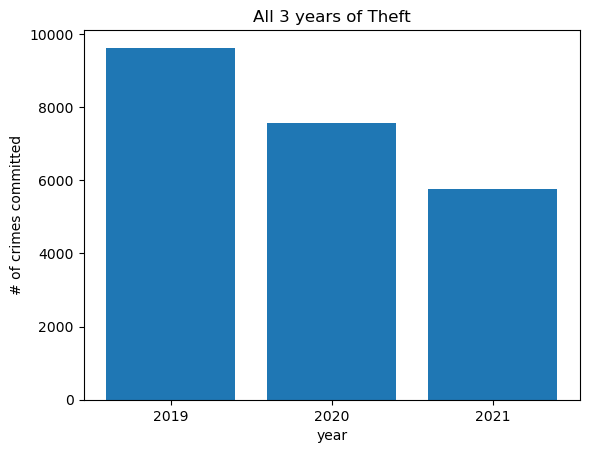

[9624, 7563, 5748]

In [85]:
theft = [theft_2019, theft_2020, theft_2021]
years = ["2019", "2020", "2021"]
plt.bar(years, theft)
plt.title("All 3 years of Theft")
plt.ylabel("# of crimes committed")
plt.xlabel("year")
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()
theft